
## <font color=black> Banka İçin Doğru Müşteri Tahmin Etme</font>

In [1]:
# Bu projede bir bankanın müsteri seçerken ödeme potansiyeli yüksek olanları ulacağız. Classification modeli kullanacağız.

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [3]:
df=pd.read_csv('LoansTrainingSet.csv')

C:\Users\İdeaPad\AppData\Local\Temp\ipykernel_8476\841172785.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('LoansTrainingSet.csv')


### <font color=purple> EDA </font>

In [4]:
df.head(80)      #EDA

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,00107579-7f8f-4f07-aae3-e9c7724cddd9,368fa9f4-da5e-4fa7-a610-c498e199d549,Fully Paid,15410,Short Term,743.0,10+ years,Home Mortgage,69952.0,Debt Consolidation,$757.82,20.4,37.0,7,0,14320,26469,0.0,0.0
76,0011592e-e3f9-4be5-8af7-dfdb671b234f,9a5b7d14-d53a-4e16-8a74-e983d40ea039,Fully Paid,2355,Short Term,NaN,< 1 year,Home Mortgage,NaN,Other,$968.38,17.1,17.0,7,0,6682,9319,0.0,0.0
77,0011cbe4-d160-4739-b4ce-f14f879a8b66,f36b84f0-509f-4919-a271-fb454c56557b,Fully Paid,12208,Short Term,727.0,3 years,Rent,61038.0,Debt Consolidation,$461.85,10.2,NaN,11,2,5010,14650,2.0,0.0
78,0012232d-2f05-4c1e-bbe3-b4c818cdbca2,cc5f2744-aa81-44b4-95c5-f06700ae54b6,Fully Paid,14960,Short Term,748.0,3 years,Rent,41887.0,Debt Consolidation,$984.34,14.7,NaN,22,0,18389,67607,0.0,0.0


In [5]:
df.shape

(256984, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [8]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [9]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [10]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [11]:
df['Loan Status'].value_counts()  #kredileri tam ödeyenlerle ödemyenleri buldum

Fully Paid     176191
Charged Off     80793
Name: Loan Status, dtype: int64

### FEATURE ENGINEERING

In [12]:
df["Loan Status"]=df["Loan Status"].map({'Charged Off':0,'Fully Paid':1}) #Loan Status sutunundaki charged off 0,Fully paid 1 e eşitledim, diğerlerinide oyle yaptim.
df["Term"]=df["Term"].map({'Short Term':0,'Long Term':1})
df['Home Ownership']=df['Home Ownership'].map({'Rent':0,'Home Mortgage':1,'Own Home':2})
df["Purpose"]=df["Purpose"].map({'Debt Consolidation':0,'Home Improvements':1,'Buy a car':2,'other':3})
df["Maximum Open Credit"].replace("#VALUE!",np.nan,inplace=True) #

In [13]:
df = df.drop(['Months since last delinquent', 'Loan ID', 'Customer ID'], axis=1)#boş 'işe yaramayan sütunları çıkardım çıkardım,'Loan ıd' ve 'customer ıd' sutununuda çıkardım çünkü dataya bir katkısı olduğunu düşünmüyorum, Maximum open credit sutununu temizleme ile baş edemedim, çoz zorlandım,sora onuda silmeye karar vedim.

In [14]:
df["Years in current job"]=df['Years in current job'].str.extract('(\d+)') #bu sutundaki karakterleri çıkardım numeric yaptım
df["Years in current job"]=pd.to_numeric(df["Years in current job"],errors='coerce')
df["Years in current job"].head()

0    10.0
1     4.0
2    10.0
3    10.0
4     4.0
Name: Years in current job, dtype: float64

In [15]:
df['Credit Score'] = df.loc[df['Credit Score'] > 800, 'Credit Score'].fillna(df['Credit Score'].mean()) #Credit score sutunundaki 800den buyuk verileri mean ile doldurdum mean ile doldurdum

In [16]:
df.isnull().sum()

Loan Status                       0
Current Loan Amount               0
Term                              0
Credit Score                 240797
Years in current job          11476
Home Ownership                  574
Annual Income                 61676
Purpose                       23890
Monthly Debt                      0
Years of Credit History           0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               4
Bankruptcies                    529
Tax Liens                        23
dtype: int64

In [17]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,0,NaN,10.0,1.0,33694.0,0.0,$584.03,12.3,10,0,6760,16056,0.0,0.0
1,1,3441,0,NaN,4.0,1.0,42269.0,3.0,"$1,106.04",26.3,17,0,6262,19149,0.0,0.0
2,1,21029,0,NaN,10.0,1.0,90126.0,0.0,"$1,321.85",28.8,5,0,20967,28335,0.0,0.0
3,1,18743,0,NaN,10.0,2.0,38072.0,0.0,$751.92,26.2,9,0,22529,43915,0.0,0.0
4,1,11731,0,NaN,4.0,0.0,50025.0,0.0,$355.18,11.5,12,0,17391,37081,0.0,0.0


In [18]:
df['Bankruptcies']=df['Bankruptcies'].fillna(df['Bankruptcies'].mean()) #Burada da sutunları mean ve median ile doldurdum
df['Tax Liens']=df['Tax Liens'].fillna(df['Tax Liens'].median())
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].median()) #Bu sutunda hala boş veri olunca ortalamayla doldurdum
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].median())
df['Home Ownership']=df['Home Ownership'].fillna(df['Home Ownership'].median())
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].median())
df['Purpose']=df['Purpose'].fillna(df['Purpose'].median())
df['Maximum Open Credit']=df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

In [19]:
df['Credit Score']=df['Credit Score']**2   #Burada hala boş veri gözükünce karesiyle doldurdum
df['Years in current job']=df['Years in current job']**2
df['Home Ownership']=df['Home Ownership']**2
df['Annual Income']=df['Annual Income']**2
df['Purpose']=df['Purpose']**2

In [20]:
df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.replace(',', '') # dolar işareti ve virgülleri değiştirdim

C:\Users\İdeaPad\AppData\Local\Temp\ipykernel_8476\965439828.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Monthly Debt'] = df['Monthly Debt'].str.replace('$', '').str.replace(',', '') # dolar işareti ve virgülleri değiştirdim


In [21]:
df.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,11520,0,51696100.0,100.0,1.0,1.135286e+09,0.0,584.03,12.3,10,0,6760,16056,0.0,0.0
1,1,3441,0,51696100.0,16.0,1.0,1.786668e+09,9.0,1106.04,26.3,17,0,6262,19149,0.0,0.0
2,1,21029,0,51696100.0,100.0,1.0,8.122696e+09,0.0,1321.85,28.8,5,0,20967,28335,0.0,0.0
3,1,18743,0,51696100.0,100.0,4.0,1.449477e+09,0.0,751.92,26.2,9,0,22529,43915,0.0,0.0
4,1,11731,0,51696100.0,16.0,0.0,2.502501e+09,0.0,355.18,11.5,12,0,17391,37081,0.0,0.0
5,1,10208,0,51696100.0,100.0,0.0,1.751674e+09,0.0,561.52,13.2,4,1,2289,4671,1.0,0.0
6,0,24613,1,44089600.0,36.0,0.0,2.423101e+09,0.0,542.29,17.6,7,0,14123,16954,0.0,0.0
7,0,24613,1,51696100.0,36.0,0.0,3.750583e+09,0.0,542.29,17.6,7,0,14123,16954,0.0,0.0
8,1,10036,0,51696100.0,25.0,0.0,3.750583e+09,0.0,386.36,17.7,7,0,11970,16579,0.0,0.0
9,1,2036,0,51696100.0,36.0,1.0,3.134320e+09,0.0,741.79,19.8,7,0,10926,15676,0.0,0.0


In [22]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [23]:
 # y: yani hedef Loan Status. x kalan sutunlar

In [24]:
x=df[[ 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History' , 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']]
y=df[['Loan Status']] 

In [25]:
import numpy as np 

y = np.ravel(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
G=GradientBoostingClassifier()

In [30]:
G.fit(x_train,y_train)

GradientBoostingClassifier()

In [31]:
model=G.fit(x_train, y_train)

In [32]:
tahmin=G.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [34]:
accuracy_score(tahmin,y_test) 

0.7573010097865635

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [36]:
GN=GaussianNB()
BN=BernoulliNB()

In [37]:
GN.fit(x_train,y_train)

GaussianNB()

In [38]:
tahmin2=GN.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
accuracy_score(tahmin2, y_test)   #68 den yukarı çıkamadım

0.6845341167772439

In [42]:
confusion_matrix(tahmin, y_test)

array([[ 4884,  1197],
       [11277, 34039]], dtype=int64)

In [43]:
import seaborn as sns

<Axes: >

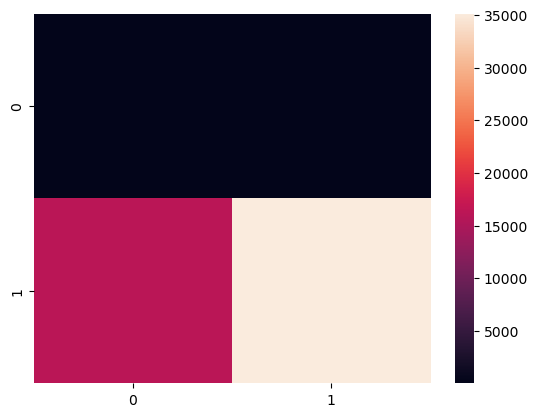

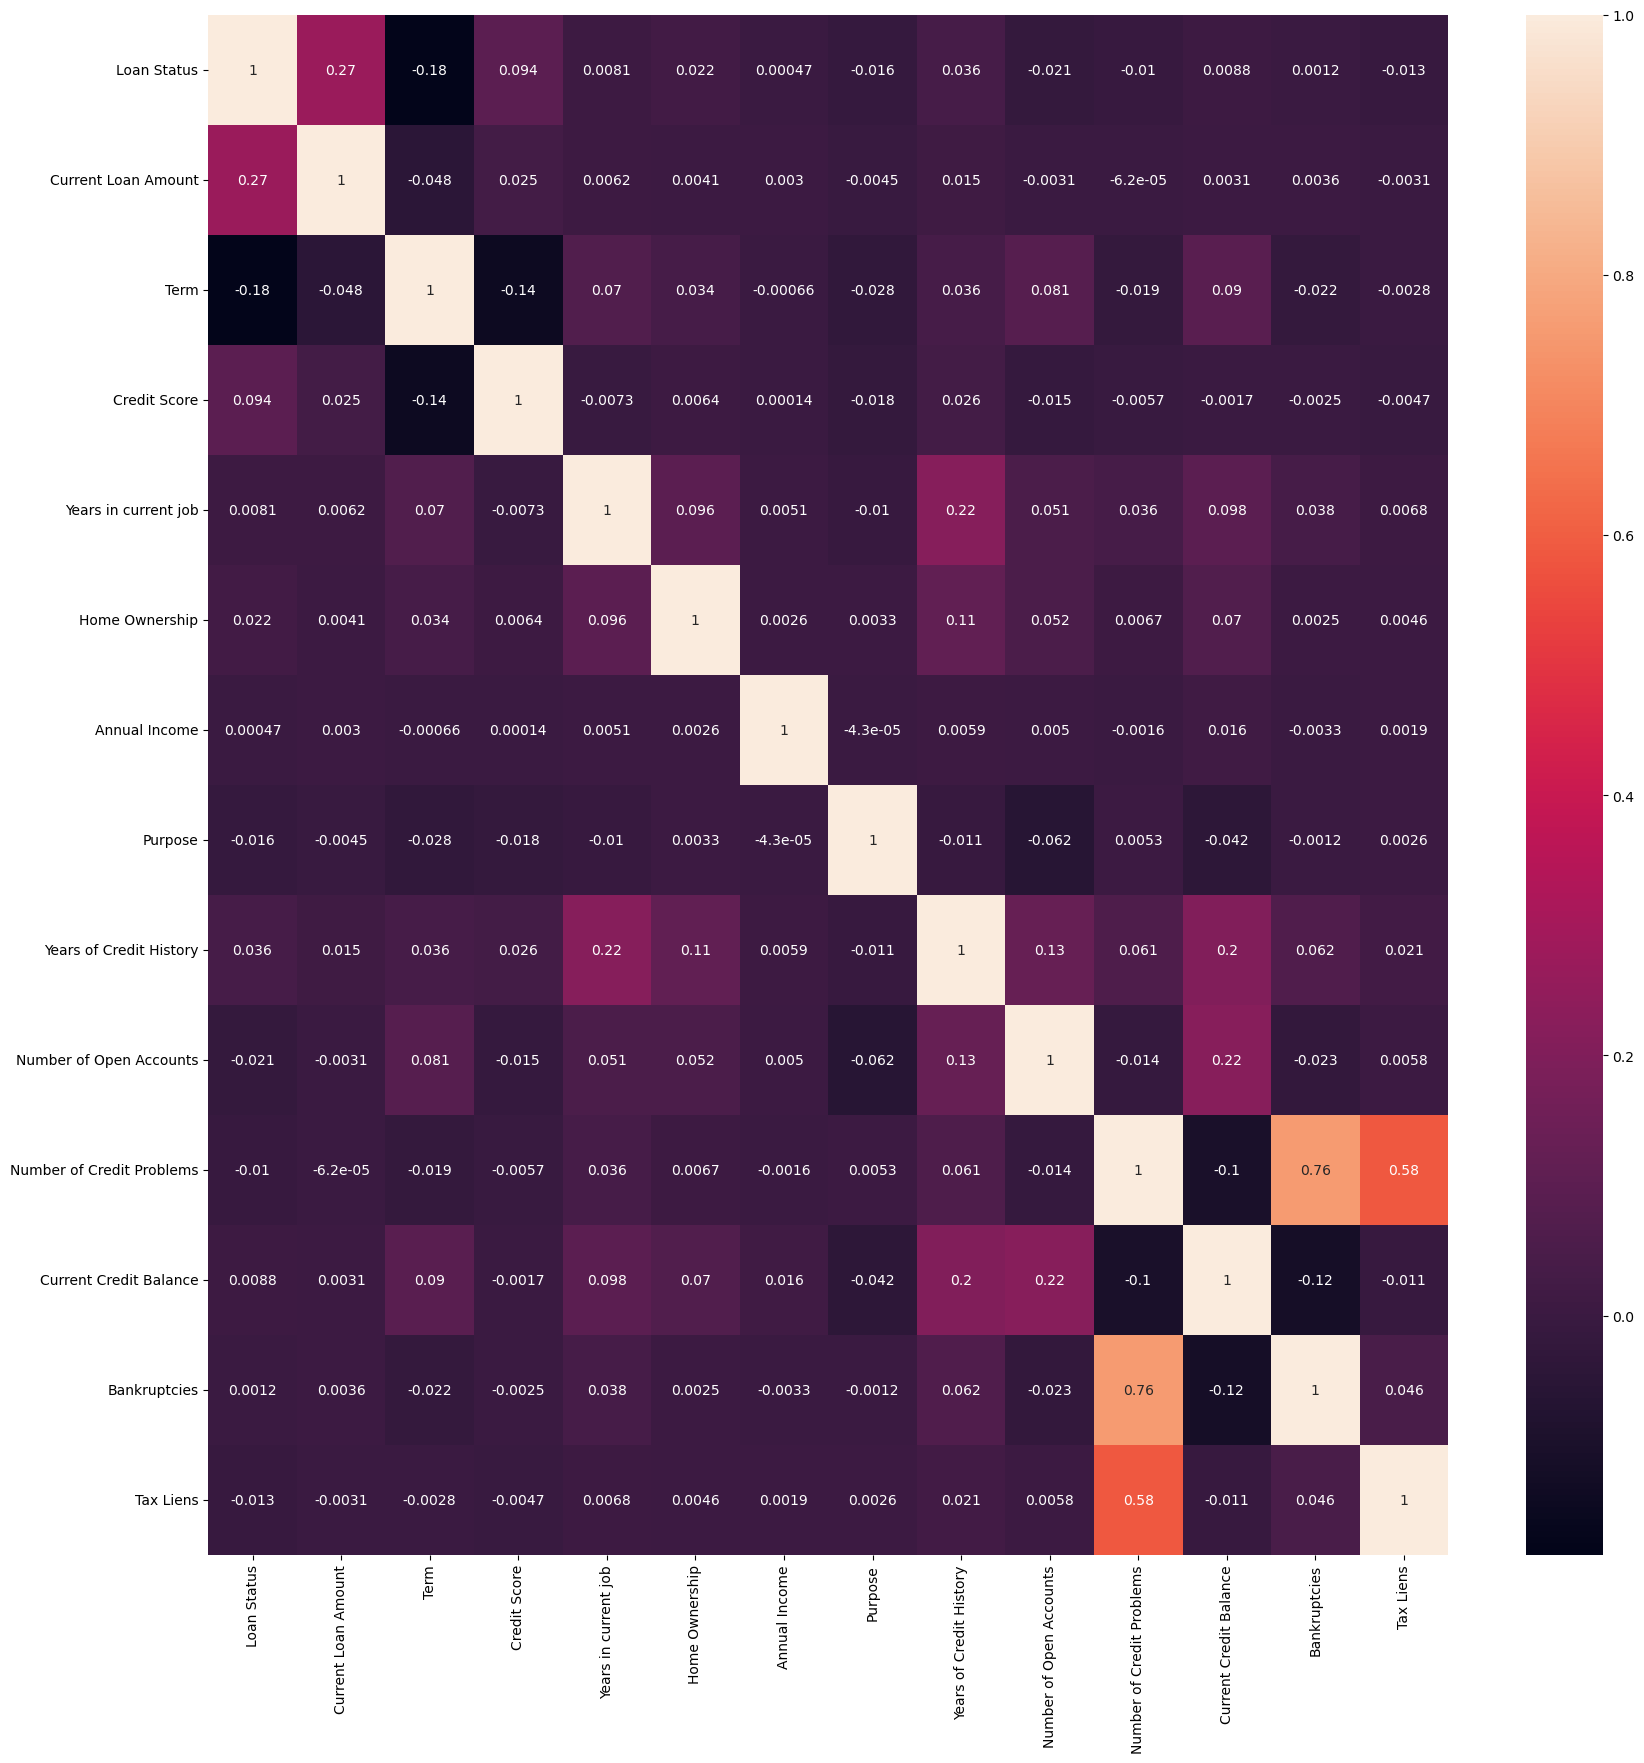

In [44]:
sns.heatmap(confusion_matrix(tahmin2, y_test))
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [45]:
!pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier

Defaulting to user installation because normal site-packages is not writeable


In [46]:
k=KNeighborsClassifier()

In [47]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [48]:
tahmin3=k.predict(x_test)

In [49]:
accuracy_score(tahmin3, y_test)

0.6900208183357005

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
r=RandomForestClassifier()

In [52]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
tahmin4=r.predict(x_test)

In [54]:
accuracy_score(tahmin4, y_test)

0.8506527618343483